# Task A

For this task we will use XGBoost trained on speed dating dataset where we will predict whether a person will get a match or not.

In [35]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

speed_dating_data = pd.read_csv('SpeedDating.csv', index_col=0)

X = speed_dating_data.drop(['TARGET'], axis=1)
y = speed_dating_data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train.head()


X_train shape: (838, 18)
X_test shape: (210, 18)


,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,intelligence_o,funny_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,interests_correlate,like
1553,10.0,10.0,20.0,20.0,20.0,20.0,4.0,8.0,9.0,3.0,10.0,20.0,35.0,10.0,5.0,20.0,0.09,3.0
1776,15.0,15.0,20.0,25.0,10.0,15.0,7.0,8.0,8.0,8.0,20.0,15.0,20.0,15.0,12.0,18.0,0.34,8.0
623,20.0,20.0,20.0,15.0,15.0,10.0,7.0,5.0,6.0,4.0,20.0,35.0,20.0,10.0,10.0,5.0,0.22,9.5
717,20.0,20.0,15.0,15.0,15.0,15.0,6.0,8.0,7.0,8.0,25.0,10.0,35.0,15.0,0.0,15.0,0.11,3.0
1275,15.0,10.0,30.0,10.0,5.0,30.0,7.0,8.0,6.0,3.0,15.0,21.0,18.0,18.0,10.0,18.0,0.40,7.0


In [26]:
X.describe()


,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,intelligence_o,funny_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,interests_correlate,like
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,23.728235,16.971021,22.255887,17.325029,9.725792,10.333626,6.211355,7.387405,6.296756,5.423664,23.767147,17.366403,21.818693,16.731861,9.990448,10.838721,0.154990,6.218034
std,12.660571,7.450629,7.352106,6.666005,7.073420,6.763784,1.964935,1.542834,2.065131,2.168277,13.564118,7.424406,7.313741,6.567908,7.245919,6.940581,0.335816,1.858517
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.630000,0.000000
25%,15.000000,10.000000,20.000000,10.832500,5.000000,5.000000,5.000000,6.875000,5.000000,4.000000,15.000000,11.110000,20.000000,10.000000,5.000000,5.000000,-0.110000,5.000000
50%,20.000000,18.000000,20.000000,18.180000,10.000000,10.000000,6.000000,7.000000,6.000000,5.000000,20.000000,20.000000,20.000000,15.000000,10.000000,10.000000,0.150000,6.000000
75%,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000,8.000000,8.000000,8.000000,7.000000,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000,0.420000,7.000000
max,100.000000,40.000000,50.000000,40.000000,53.000000,30.000000,10.000000,10.000000,10.000000,10.000000,100.000000,40.000000,50.000000,40.000000,53.000000,30.000000,0.900000,10.000000


In [3]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Let's 2 pick random observations, and run the model on them.


In [39]:
observations = X_test.sample(2)
predictions = model.predict(observations)
predictions_proba = model.predict_proba(observations)


In [41]:
print(f'OBSERVATION 1')
print(observations.iloc[0])
print(f'\nPrediction: {predictions[0]}')
print(f'Class 1 probability: {predictions_proba[0][1]}')

print(f'\n\nOBSERVATION 2')
print(observations.iloc[1])
print(f'\nPrediction: {predictions[1]}')
print(f'Class 1 probability: {predictions_proba[1][1]}')


OBSERVATION 1
pref_o_attractive             20.00
pref_o_sincere                10.00
pref_o_intelligence           20.00
pref_o_funny                  20.00
pref_o_ambitious              20.00
pref_o_shared_interests       10.00
attractive_o                   4.00
intelligence_o                 7.00
funny_o                        5.00
shared_interests_o             3.00
attractive_important          40.00
sincere_important             10.00
intellicence_important        10.00
funny_important               10.00
ambtition_important           10.00
shared_interests_important    20.00
interests_correlate            0.33
like                           7.00
Name: 1771, dtype: float64

Prediction: 0
Class 1 probability: 0.0004275372775737196


OBSERVATION 2
pref_o_attractive             10.0
pref_o_sincere                20.0
pref_o_intelligence           40.0
pref_o_funny                  10.0
pref_o_ambitious              10.0
pref_o_shared_interests       10.0
attractive_o               

Now let's plot the SHAP explonations obtained for these two observations with `dalex` library.

In [42]:
import dalex as dx
dx_explainer = dx.Explainer(model, X_train, y_train, label="XGBoost")


Preparation of a new explainer is initiated

  -> data              : 838 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 838 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost
  -> predict function  : <function yhat_proba_default at 0x2840b6fc0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.93e-05, mean = 0.177, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.25, mean = -7.71e-05, max = 0.268
  -> model_info        : package xgboost

A new explainer has been created!


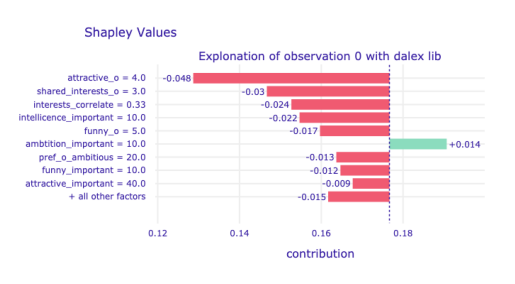

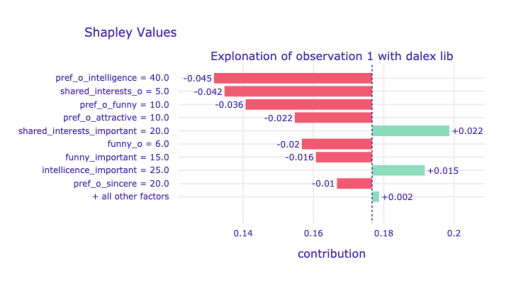

In [43]:
attributions = [
    dx_explainer.predict_parts(
        observations.iloc[i], type='shap', label=f'Explonation of observation {i} with dalex lib'
    )
    for i in range(2)
]

for i in range(2):
    fig = attributions[i].plot(show=False)
    fig.write_image(f'img/dalex_obs_{i}.png')
    img = plt.imread(f'img/dalex_obs_{i}.png')
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [44]:
import shap

shap_explainer = shap.TreeExplainer(model, X_train)


[23:22:10] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Now let's plot the SHAP explonations obtained for these two observations with `SHAP` library.

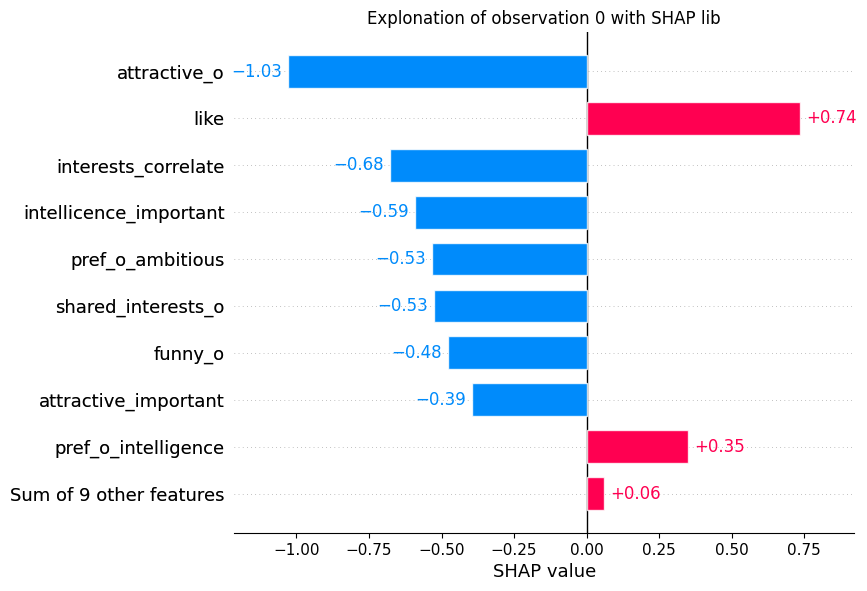

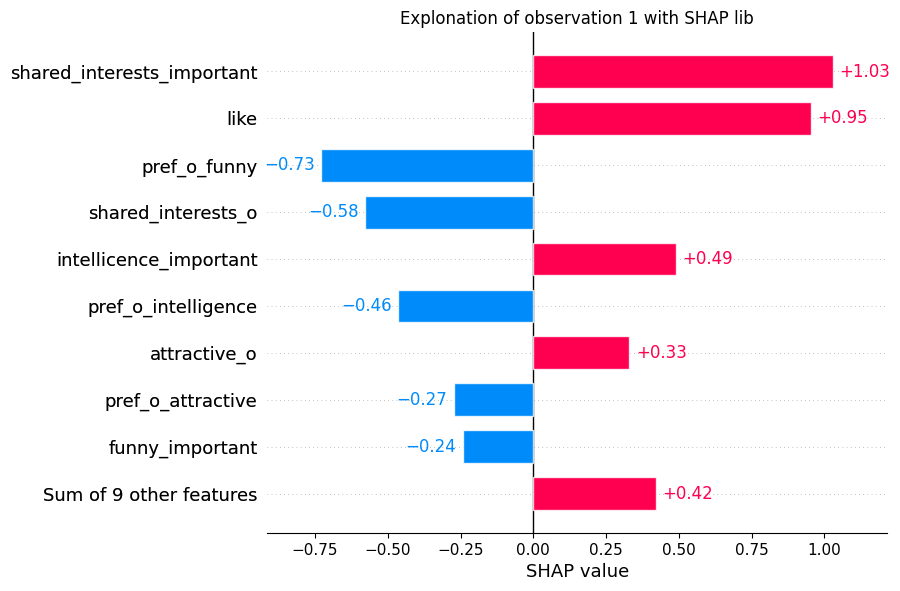

In [45]:
shap_values = shap_explainer(observations)

for i in range(2):
    plt.title(f'Explonation of observation {i} with SHAP lib')
    shap.plots.bar(shap_values[i])


As we can see those two libraries provide totally different explanations for chosen observations. It could be because of:
1) different methods of calculating SHAP values - `dalex` doesn't support the tree explainer 
2) randomness caused by underlying sampling

Let's also see the global SHAP explonations with beeswarm plot.

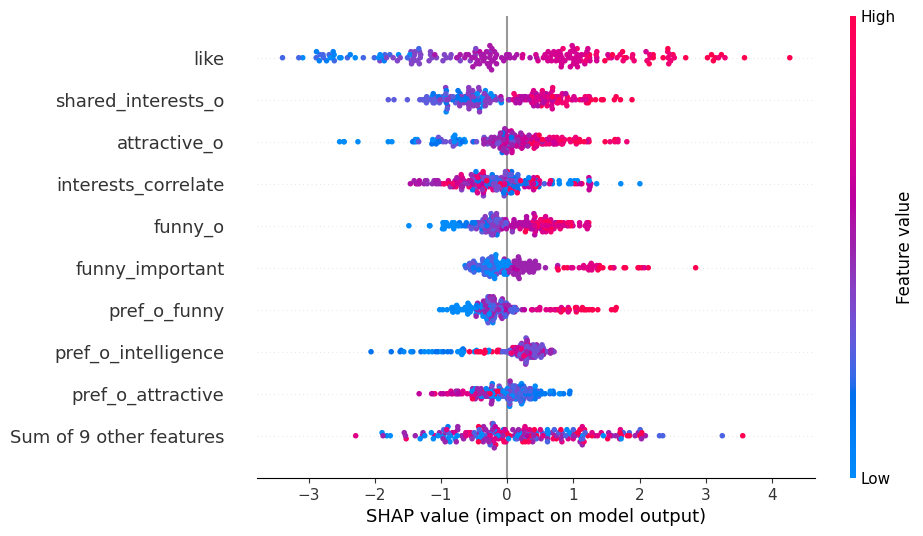

In [74]:
shap_values_all = shap_explainer(X_test)
shap.plots.beeswarm(shap_values_all, max_display=10, plot_size=(9, 6))


As we see, the `like` feature has the highest impact on the model output globally. Also higher `like` feature values have positive impact on predicting class 1 (match).

### (4)
```
Find any two observations in the dataset, such that they have different variables of the highest importance, e.g. age and gender have the highest (absolute) attribution for observation A, but race and class are more important for observation B.
```

I have found the observation A that has `shared_interests` and `like` as the most important features, and observation B that has `pref_o_intelligence` and `pref_o_funny` as the most important features.

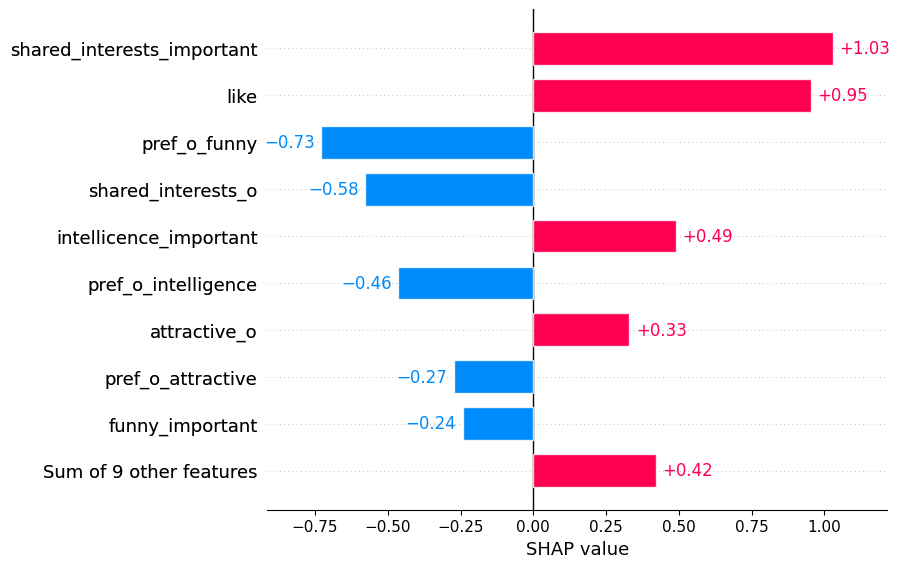

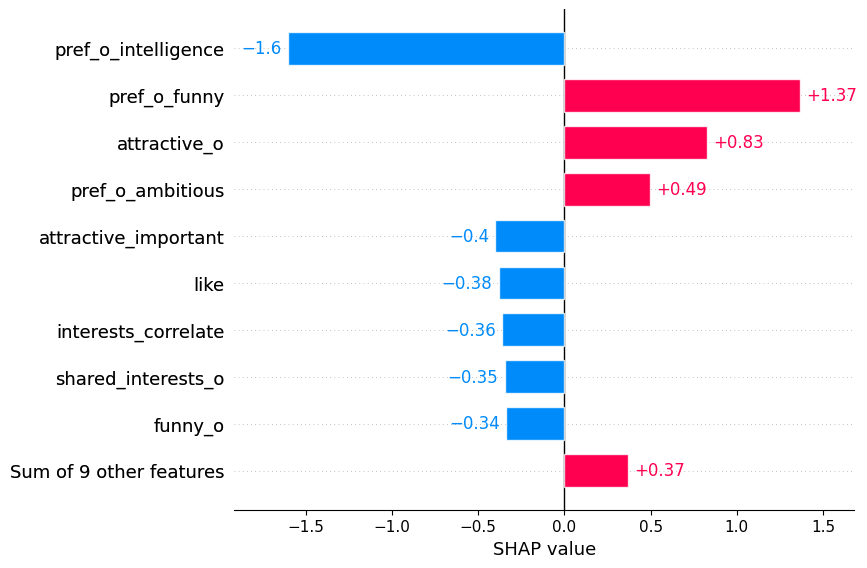

In [47]:
import numpy as np


feature_pairs = {}

for i, values in enumerate(np.array(shap_values_all.values)):
    max_2_indices = tuple(sorted(np.argsort(values)[-2:]))
    if max_2_indices not in feature_pairs:
        feature_pairs[max_2_indices] = [i]
    else:
        feature_pairs[max_2_indices].append(i)

feature_pair_1 = list(feature_pairs.keys())[0]
for key in list(feature_pairs.keys())[1:]:
    if feature_pair_1[0] not in key and feature_pair_1[1] not in key:
        feature_pair_2 = key


observations_1_index = feature_pairs[feature_pair_1][0]
observations_2_index = feature_pairs[feature_pair_2][0]

shap.plots.bar(shap_values_all[observations_1_index])
shap.plots.bar(shap_values_all[observations_2_index])


Let's also check how the dalex explainer works with these observations.

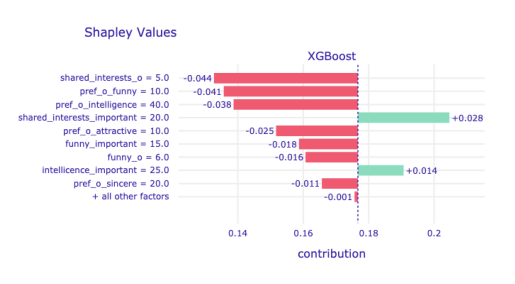

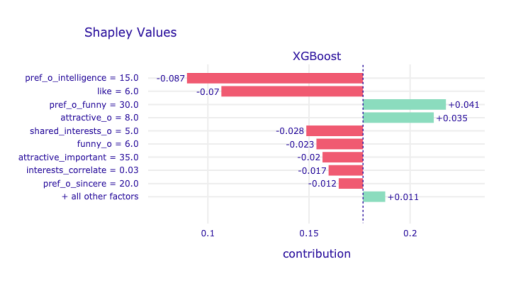

In [48]:
fig1 = dx_explainer.predict_parts(X_test.iloc[observations_1_index], type='shap').plot(show=False)
fig2 = dx_explainer.predict_parts(X_test.iloc[observations_2_index], type='shap').plot(show=False)

fig1.write_image('img/dalex_obs_0_task_4.png')
fig2.write_image('img/dalex_obs_1_task_4.png')

img1 = plt.imread('img/dalex_obs_0_task_4.png')
img2 = plt.imread('img/dalex_obs_1_task_4.png')
plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()


Again, two explainer provide very different explanations for the same observations.

### (5)
```
(If possible) Select one variable X and find two observations in the dataset such that for one observation, X has a positive attribution, and for the other observation, X has a negative attribution.
```

Here i will look at `like` feature

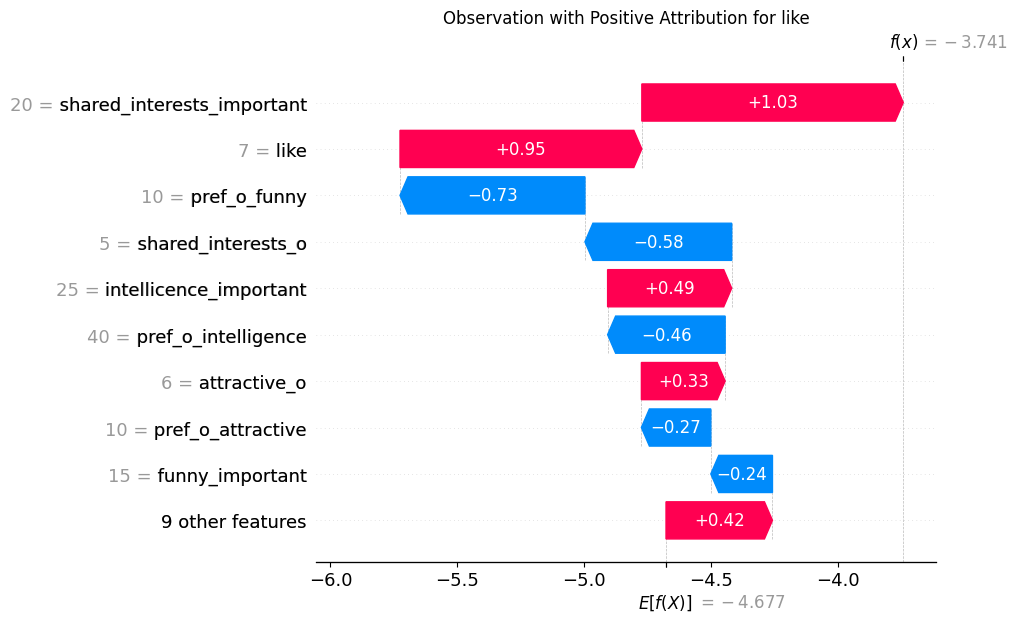

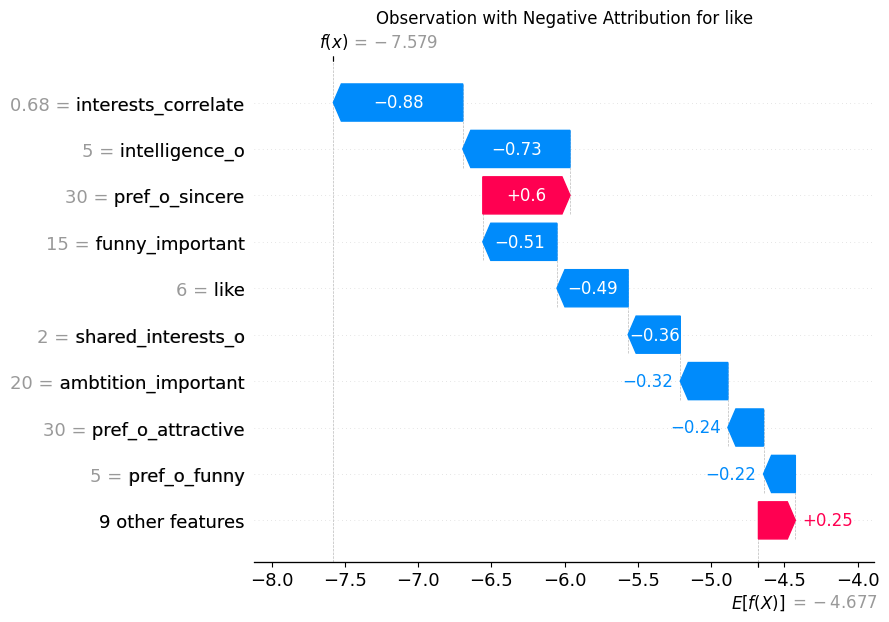

In [49]:

shap_values_all_df = pd.DataFrame(shap_values_all.values, columns=X_test.columns)

FEATURE = 'like'

positive_attribution = shap_values_all_df[shap_values_all_df[FEATURE] > 0].index
negative_attribution = shap_values_all_df[shap_values_all_df[FEATURE] < 0].index

observation_positive = positive_attribution[0]
observation_negative = negative_attribution[0]


plt.title(f"Observation with Positive Attribution for {FEATURE}")
shap.plots.waterfall(shap_values_all[observation_positive])
plt.title(f"Observation with Negative Attribution for {FEATURE}")
shap.plots.waterfall(shap_values_all[observation_negative])


The second observation with negative attribution has `like` feature value below the mean and median while the first observation with positive attribution has `like` feature value around 75% percentile. Contribution of this feature in presented explonations seem to be consistent with the global SHAP explonations - higher `like` feature values have positive impact on predicting class 1 (match).

### (7)
```
(Using one explanation package of choice) Train another model of any class: neural network, linear model, decision tree etc. and find an observation for which SHAP attributions are different between this model and the one trained in point (1).
```
I will train a decision tree model and compare it with previously trained XGBoost model.

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

(210, 18, 2)


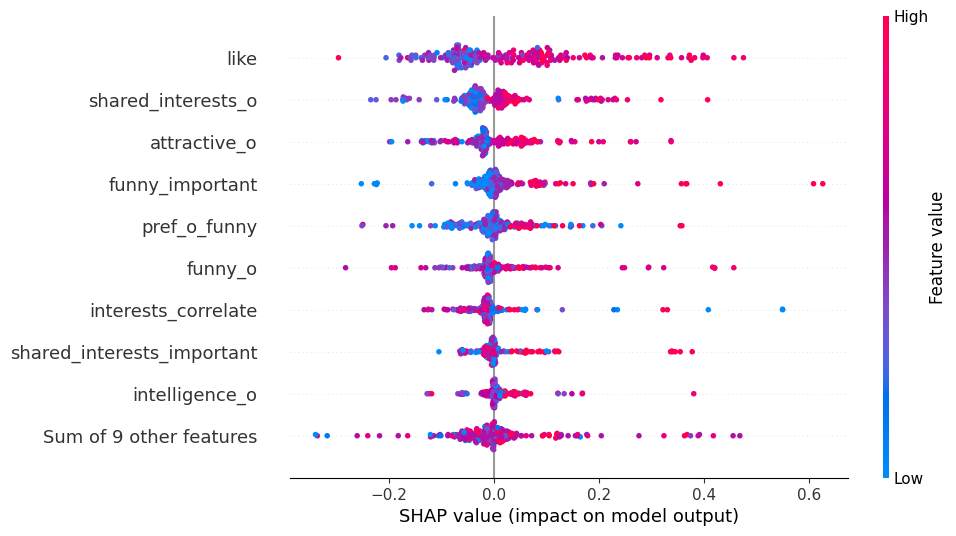

In [78]:
shap_explainer_dt = shap.TreeExplainer(dt_model, X_train)
shap_values_all_dt = shap_explainer_dt(X_test)
print(shap_values_all_dt.shape)
shap.plots.beeswarm(shap_values_all_dt[:,:,1], max_display=10, plot_size=(9, 6))


The global explonations are quite similar for both models. Especially the most 3 important features are the same for both models according to explainers.


# Task B
Calculate SHAPLEY value for player A.
Value function:
```
v() = 0
v(A) = 20
v(B) = 20
v(C) = 60
v(A,B) = 60
v(A,C) = 70
v(B,C) = 70
v(A,B,C) = 100
```
players: A, B, C

In [106]:

from itertools import combinations
import math

V = {
    '': 0,
    'A': 20,
    'B': 20,
    'C': 60,
    'AB': 60,
    'AC': 70,
    'BC': 70,
    'ABC': 100
}

players = ['A', 'B', 'C']
player = 'A'
shapley = 0

N = len(players)

for i in range(N):
    for subset in combinations(players, i):
        if player not in subset:
            subset_str = ''.join(sorted(subset))

            subset_player_str = ''.join(sorted(subset + (player,)))
            contr = V[subset_player_str] - V[subset_str]

            shapley += (math.factorial(i) * math.factorial(N - i - 1) / math.factorial(N)) * contr


print(f"Shapley value for player {player} is {shapley}")


Shapley value for player A is 25.0
